In [ ]:
###所有MCMC采样的核心思想都是一样的
###需要已知或假定数据分布的解析式，需要把解析式显式表达
###如果是从给定分布采样随机变量X,那么写出单个x(i)的条件概率分布表达式,并在不同的x(i)中轮换
###如果是已知样本点估计分布参数,那么根据MH算法和贝叶斯公式写出单个参数的条件概率分布表达式,并在不同的参数中轮换

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import re
import os
import math
from matplotlib import pyplot as plt

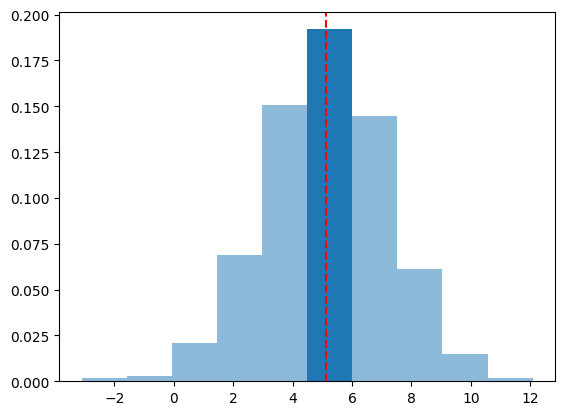

In [33]:
###普通 Metropolis-Hastings采样
#####模拟正态分布(0, 4)
#######建议分布设置为正态分布，当前值为均值，自定义步长为方差进行t+1时态采样

def target_distri_normal(x):
    return np.exp(-0.5 * (x - 5) ** 2 / 4)

init_point = np.random.uniform(0, 5)
proposal_distri = np.random.normal
T, step_lenth = 10000, 0.5

def MH_sampling(current_state, proposal_distri, target_distri, step_lenth):
    new_state = proposal_distri(current_state, step_lenth)
    accept_rate = target_distri(new_state) / target_distri(current_state)  #假设建议分布是对称的
    accept_num = np.random.random()
    if accept_num > accept_rate:
        return current_state
    else:
        return new_state

all_points = []
all_points.append(init_point)

state = init_point
for i in range(T):
    state = MH_sampling(state, proposal_distri, target_distri_normal, step_lenth)
    all_points.append(state)

expectation = np.mean(all_points)
n_0, bins_0, patches_0 = plt.hist(all_points, density=True, alpha=0.5)
patches_0[np.digitize(expectation, bins_0)-1].set_linewidth(1)
patches_0[np.digitize(expectation, bins_0)-1].set_alpha(1)
plt.axvline(expectation, color='red', linestyle='dashed')
plt.show()

In [107]:
###估计一元线性回归参数
N = 100
true_a, true_b = 2, 1
x = np.random.uniform(0, 10, N).round(2)
eps = np.random.normal(0, 1, N).round(2)

In [108]:
y = true_a * x + true_b + eps
y, x, eps

(array([13.2 , 16.22, 12.76,  2.79,  8.89, 18.53, 17.33,  5.6 , 12.53,
        13.4 ,  9.37,  3.23, 19.5 ,  9.88, 18.95, 13.44, 18.77,  9.47,
        11.06,  4.19,  3.73,  7.65, 17.11, 11.22,  2.62, 20.44,  9.94,
        17.28, 14.6 , 10.48, 18.25,  7.79,  3.58, 10.65, 16.8 ,  2.82,
        11.74, 13.64,  0.94,  0.44, 11.04, 12.39, 18.7 ,  4.23,  5.89,
        19.36, 12.91, 17.87, -0.11,  3.55, 17.82, 14.21, 10.49, 18.78,
         3.89, 18.11, 21.52,  7.08,  6.19, 10.75, 14.09, 19.83, 10.  ,
         9.82,  2.23,  9.65, 11.93,  4.34,  5.49,  7.28,  8.91, 16.88,
        20.07, 11.33,  6.09,  6.22,  5.79,  5.1 ,  7.92, 17.23, 18.38,
        19.99, 17.87, 12.46, 16.51, 14.57, 15.3 , 12.2 , 17.01,  4.87,
         0.47,  3.74, 16.  ,  5.73, 10.53, 10.13, 14.82, 19.16, 12.96,
         5.68]),
 array([6.06, 7.12, 6.37, 1.61, 3.11, 8.6 , 8.46, 2.13, 6.42, 6.68, 4.77,
        1.35, 8.99, 4.72, 8.87, 6.11, 7.79, 4.01, 5.12, 1.59, 1.6 , 2.77,
        7.76, 5.07, 1.13, 9.39, 4.61, 7.23, 7.35, 4.9 

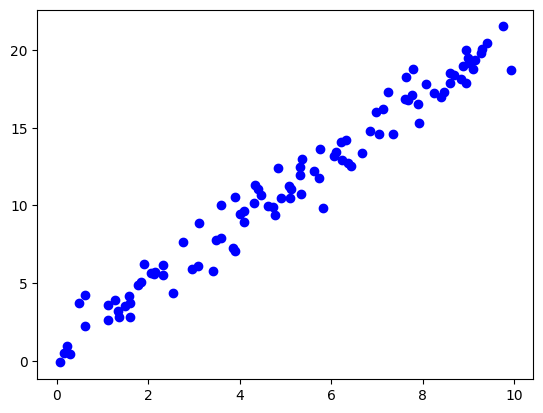

In [109]:
plt.scatter(x, y, color='blue', label='Samples')
plt.show()

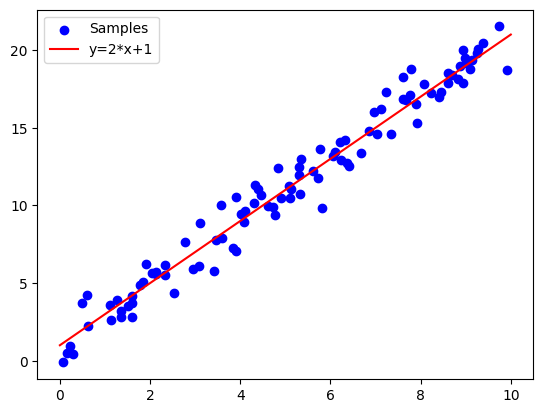

In [110]:
plt.scatter(x, y, color='blue', label='Samples')
x_line = np.linspace(0, 10, N)
y_line = true_a * x_line + true_b
plt.plot(x_line, y_line, color='red', label='y=2*x+1')
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.legend()
plt.show()

In [111]:
def para_sample_b(y, x, a, tau_b, tau, mu_b):
    num = len(x)
    denominator = tau + num * tau_b
    mean = (mu_b * tau + tau_b * np.sum(y - a * x)) / denominator
    sigma = tau * tau_b / denominator
    return np.random.normal(mean, sigma)

def para_sample_a(y, x, b, tau_a, tau, mu_a):
    num = len(x)
    denominator = tau + tau_a * np.sum(np.square(x))
    mean = (tau_a * mu_a + tau_a * np.sum((y - b) * x)) / denominator
    sigma = tau * tau_a / denominator
    return np.random.normal(mean, sigma)

def para_sample_sigma(y, x, a, b, alpha, beta):
    num = len(x)
    alpha_new = alpha + num / 2
    residual = y - a * x - b
    beta_new = beta + np.sum(np.square(residual)) / 2
    return np.random.gamma(alpha_new, 1 / beta_new)

In [112]:
init = {'a_0': 3, 'b_0': 3, 'tau_0': 2}
hyper_para = {'mu_a': 0, 'tau_a': 1,
             'mu_b': 1, 'tau_b': 1,
             'alpha': 4, 'beta': 5}
T = 1000

In [113]:
def gibbs_sampling(y, x, init, hyperpara, T):
    b = init['b_0']
    a = init['a_0']
    sigma = init['tau_0']

    for i in range(T):
        b = para_sample_b(y, x, a, hyper_para['tau_b'], sigma, hyper_para['mu_b'])
        a = para_sample_a(y, x, b, hyper_para['tau_a'], sigma, hyper_para['mu_a'])
        sigma = para_sample_sigma(y, x, a, b, hyper_para['alpha'], hyper_para['beta'])
        yield (b, a, sigma)

In [114]:
trace = [[b, a, tau] for b, a, tau in gibbs_sampling(y, x, init, hyper_para, T)]
trace = np.array(trace)
trace

array([[-3.92452207,  2.74773071,  0.19653032],
       [-2.77565713,  2.57690889,  0.31201684],
       [-1.9056765 ,  2.44599398,  0.43609526],
       ...,
       [ 0.97136091,  2.0120496 ,  1.05719656],
       [ 0.97888965,  2.01120908,  1.16079837],
       [ 0.97779411,  2.01146487,  0.97684903]])

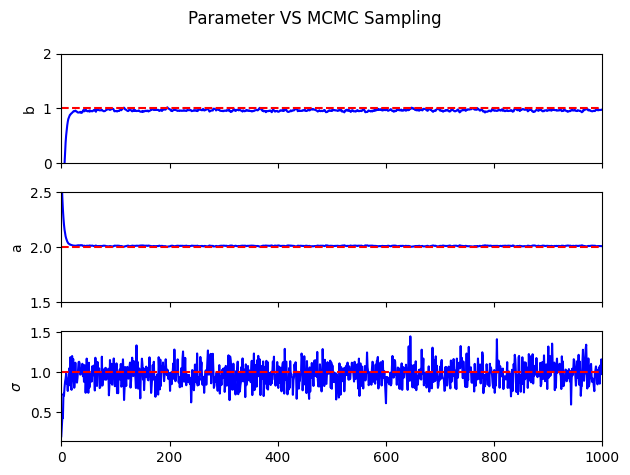

In [115]:
fig, axs = plt.subplots(3, 1, sharex=True)
xs = np.arange(T)
axs[0].plot(xs, trace[:, 0], color='blue', linestyle='-')
axs[0].plot(xs, [true_b] * len(xs), color='red', linestyle='dashed')
axs[0].set_ylabel('b')
axs[0].set_ylim(0, 2)
axs[1].plot(xs, trace[:, 1], color='blue', linestyle='-')
axs[1].plot(xs, [true_a] * len(xs), color='red', linestyle='dashed')
axs[1].set_ylabel('a')
axs[1].set_ylim(1.5, 2.5)
axs[2].plot(xs, trace[:, 2], color='blue', linestyle='-')
axs[2].plot(xs, [1] * len(xs), color='red', linestyle='dashed')
axs[2].set_ylabel(r'$\sigma$')
fig.suptitle('Parameter VS MCMC Sampling')
plt.xlabel = 'Chain'
plt.xlim(0, T)
plt.tight_layout()
plt.show()

In [116]:
axs

array([<Axes: ylabel='b'>, <Axes: ylabel='a'>, <Axes: ylabel='$\\sigma$'>],
      dtype=object)

In [117]:
burn_in = 100
stable_data = trace[100:]
print(f'a的模拟均值是{np.mean(stable_data[:, 1])},\n', 
      f'b的模拟均值是{np.mean(stable_data[:, 0])},\n',
    f'sigma的模拟均值是{np.mean(stable_data[:, 2])}')

a的模拟均值是2.0132705817909784,
 b的模拟均值是0.9657664665142341,
 sigma的模拟均值是0.9710443725299519


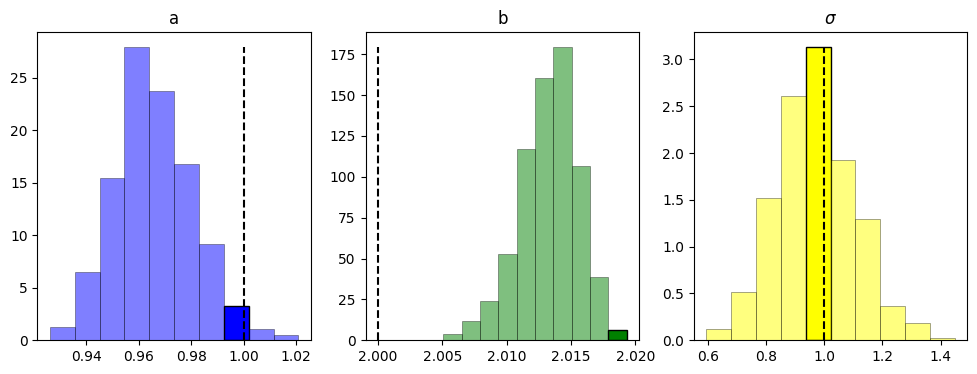

In [118]:
#若先验设置的不太好，则这里会报错，因为真值很可能不会在采样出来的分布范围内,如果低于还好说,超出了就会+1,比如10个元素给你第11,会导致超过索引上限

labels = ['a', 'b', r'$\sigma$']
fig1, axs1 = plt.subplots(1, 3, figsize=(12, 4))
colors = ['blue', 'green', 'yellow']
for i, (ax, true) in enumerate(zip(axs1.ravel(), [true_b, true_a, 1])):
    # print(i, (ax, true))
    n, bins, patches = ax.hist(stable_data[:, i], density=True, facecolor=colors[i], edgecolor='k', linewidth=0.5, alpha=0.5)
    # print(n, bins, patches, true, type(bins))
    patches[np.digitize(true, bins)-1].set_linewidth(1) #digitize为寻找第一个参数在第二个之中的位置，返回索引
    patches[np.digitize(true, bins)-1].set_alpha(1)
    ax.plot([true]*2, [0, np.amax(n)], 'k--') #第二个为找出矩阵中最大值，第三个是高级颜色控制，形式为'color=颜色单字母marker=类型+线类型'，如绿色，圆圈，虚线为'go--'
    ax.set(title=labels[i])
plt.show()

In [104]:
np.digitize(1, np.array([0.68417848, 0.69234778, 0.70051707, 0.70868636, 0.71685566, 0.72502495,
 0.73319425, 0.74136354, 0.74953284, 0.75770213, 0.76587142]))

11

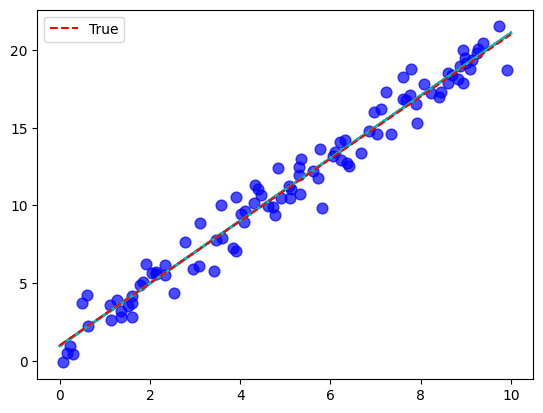

In [119]:
#最后100个参数的直线与原直线对比
plt.scatter(x, y, s=60, color='blue', alpha=0.7)
xs = np.linspace(0, 10, 20)
for b_simulated, a_simulated in stable_data[-100:, :2]:
    plt.plot(xs, a_simulated * xs + b_simulated, 'c-', alpha=0.1)
plt.plot(xs, true_a * xs + true_b, 'r--', label='True')
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.legend()
plt.show()

In [257]:
#高维分布吉布斯采样 公式详见wiki multivariate normal distribution词条

N_2d = 1000
x_init = np.array([0., 0.])
mu_2d = np.array([-2, 1])
sigma_2d = np.array([[1, 0.8], [0.8, 1]]) #这个其实性质类似于高维之后sigma有个系数，并不是sigma本身，见wiki页
cov = np.power(sigma_2d, 2) #cov = sigma_2d * sigma_2d(T) = sigma_2d平方

In [227]:
x_init.dtype

dtype('float64')

In [234]:
class probability_2d():
    def __init__(self, N: int, mu_2d: np.ndarray, cov: np.ndarray):
        self.n = N
        self.mu = mu_2d
        self.cov = cov

    def sampling_condition(self, x: np.ndarray, idx):
        idx = [idx] if type(idx) is int else idx
        # x = [x] if type(x) is int else x
        # x = np.array(x) if type(x) is list else x

        
        idx_fix = [i for i in range(len(self.mu)) if i not in idx]
        mu1 = self.mu[idx]
        fix_mu = self.mu[idx_fix]
        a = x[idx_fix]

        # print(idx, idx_fix)
        #对于固定了一个x的另一个x的条件概率分布服从: x~(mu1, sigma1)，其中mu1 = mu[idx] + cov[idx, idx_fix] * cov[idx_fix, idx_fix] * (a - mu[idx_fix])
        #而 sigma1 = cov[idx, idx] - cov[idx, idx_fix] * cov[idx_fix, idx_fix] * cov[idx_fix, idx]
        cov11 = self.cov[np.ix_(idx, idx)] #np.ix_丢进一个二维数组[[a, b], [c, d]]，先选a, b行，再选c, d列，行列a, b与b, a顺序不同
        cov12 = self.cov[np.ix_(idx, idx_fix)]
        cov21 = self.cov[np.ix_(idx_fix, idx)]
        cov22 = self.cov[np.ix_(idx_fix, idx_fix)]

        mu_condition = mu1 + np.matmul(np.matmul(cov12, np.linalg.inv(cov22)), (a - fix_mu))
        var_condition = cov11 - np.matmul(np.matmul(cov12, np.linalg.inv(cov22)), cov21)
        # print(mu_condition, var_condition, fix_mu, a - fix_mu, x)
        x_new = st.multivariate_normal(mu_condition, var_condition).rvs() #不加rvs返回一个迭代器?加了就返回(n)个样本,默认n=1,想用复杂方法用这个
        # x_new = np.random.multivariate_normal(mu_condition, var_condition) #简单抽样,更快,效果等于上面,与直接抽样的区别在于使用条件均值和方差
        # print(x_new)
        return x_new

    def sampling(self, n):
        return np.random.multivariate_normal(mu_2d, cov, n)

In [235]:
cov[np.ix_([0], [0])]

array([[1.]])

In [253]:
prob = probability_2d(N_2d, mu_2d, cov)

def mcmc_gibbs(prob, x_init, chains):
    x_ls = []
    x = x_init
    for i in range(chains):
        for j in range(len(x_init)):
            x[j] = prob.sampling_condition(x, j)
        # print(x)
        x_ls.append(x.copy()) #不用copy会所有点都是最新的那个,因为x一直在变,每次添加的x不是一个新对象,而是指向原x的指针
        
    return np.vstack(x_ls) #vstack和hstack,在纵向/横向上堆叠对象

In [258]:
ls = mcmc_gibbs(prob, x_init, N_2d)

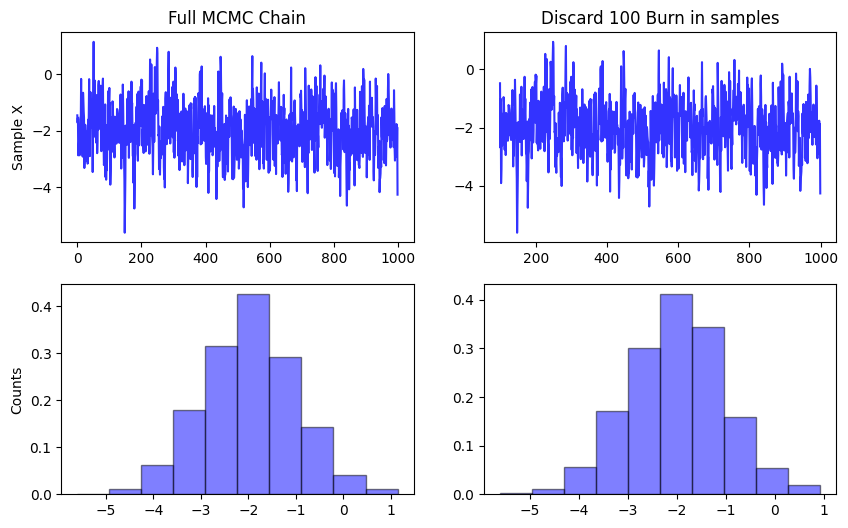

In [271]:
fig_2d, axs_2d = plt.subplots(2, 2, figsize=(10, 6))
coord_x = np.arange(N_2d)
axs_2d[0, 0].plot(coord_x, ls[:, 0], color='blue', linestyle='-', alpha=0.8)
axs_2d[0, 0].set(title='Full MCMC Chain', ylabel='Sample X')
axs_2d[0, 1].plot(coord_x[100:], ls[100:, 0], color='blue', linestyle='-', alpha=0.8)
axs_2d[0, 1].set(title='Discard 100 Burn in samples')
axs_2d[1, 0].hist(ls[:, 0], density=True, facecolor='blue', edgecolor='black', alpha=0.5)
axs_2d[1, 0].set(ylabel='Counts')
axs_2d[1, 1].hist(ls[100:, 0], density=True, facecolor='blue', edgecolor='black', alpha=0.5)
plt.show()

In [283]:
direct_sampling = np.random.multivariate_normal(mu_2d, cov, 1000)
direct_sampling

array([[-3.27476098,  0.71695267],
       [-1.24164963,  1.12222637],
       [-1.21456777,  0.73793209],
       ...,
       [-1.84806881,  1.6455794 ],
       [-2.6349933 ,  1.24707634],
       [-2.98737734, -0.8384271 ]])

C:\Users\57445\AppData\Local\Temp\ipykernel_88460\430595400.py:5: UserWarning: The figure layout has changed to tight
  g.fig.tight_layout()
C:\Users\57445\AppData\Local\Temp\ipykernel_88460\430595400.py:11: UserWarning: The figure layout has changed to tight
  q.fig.tight_layout()


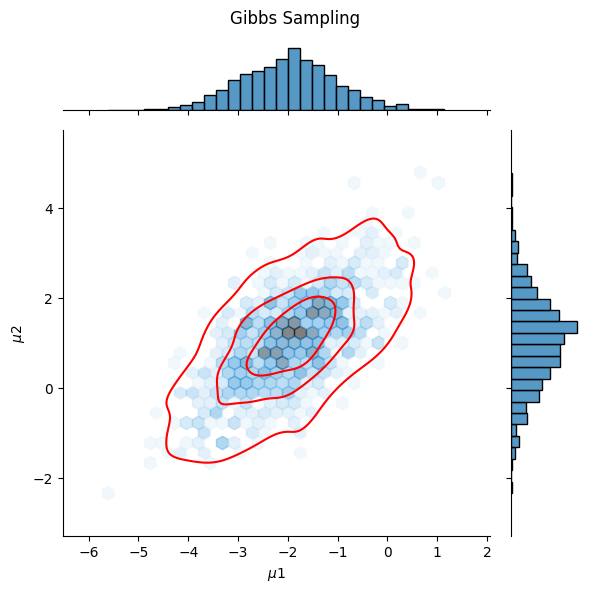

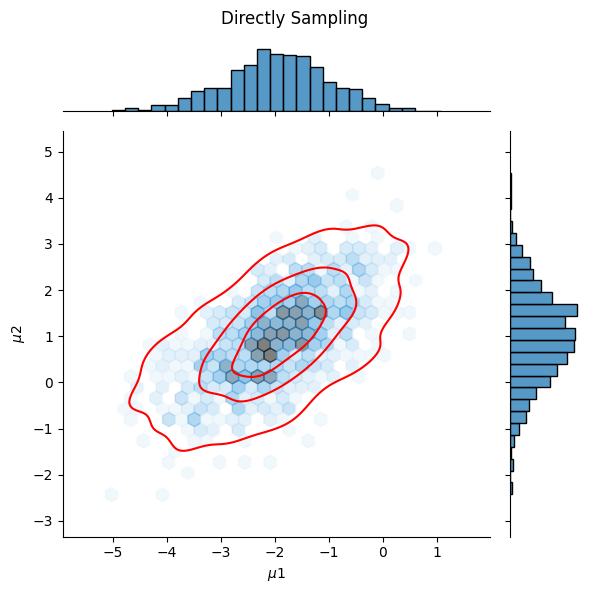

In [297]:
g = sns.jointplot(x=ls[:, 0], y=ls[:, 1], kind='hex', alpha=0.5)
g.plot_joint(sns.kdeplot, color='r', zorder=1, levels=4) #zorder,图层顺序越大越上层;levels,划成几个区,4就是4个区划三条线
g.set_axis_labels(xlabel='$\mu1$', ylabel='$\mu2$')
g.fig.suptitle('Gibbs Sampling')
g.fig.tight_layout()

q = sns.jointplot(x=direct_sampling[:, 0], y=direct_sampling[:, 1], kind='hex', alpha=0.5)
q.plot_joint(sns.kdeplot, color='r', zorder=1, levels=4) #zorder,图层顺序越大越上层;levels,划成几个区,4就是4个区划三条线
q.set_axis_labels(xlabel='$\mu1$', ylabel='$\mu2$')
q.fig.suptitle('Directly Sampling')
q.fig.tight_layout()